a) Summary Statistics & Missing-Value Report 

In [1]:
# Load data & initial checks
import pandas as pd
df = pd.read_csv("../data/togo-dapaong_qc.csv") 
df.info() # This prints a summary of the DataFrame’s structure

"""
open the CSV, inspect dtypes and rows to understand structure (timestamps, numeric columns, cleaning flags, sensors, wind columns, RH, BP, etc.).
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

'\nopen the CSV, inspect dtypes and rows to understand structure (timestamps, numeric columns, cleaning flags, sensors, wind columns, RH, BP, etc.).\n'

In [2]:
# Numeric summary: it gives mean, std, min/max, quartiles ... quick numeric summary. 
num_summary = df.describe(include='number').T 
num_summary

"""
df.describe() gives mean, std, min/max, quartiles → quick numeric summary.
"""

'\ndf.describe() gives mean, std, min/max, quartiles → quick numeric summary.\n'

In [3]:
# Missing values: shows how many missing values per column. 
# df.isna() - returns a DataFrame of booleans (True where the value is missing, False otherwise). 
# df.isna().sum() - For each column, counts how many True values there are (i.e., how many are missing). results a Series showing the count of missing values per column. 
missing_counts = df.isna().sum() 
missing_perc = (df.isna().mean() * 100).round(2) 
missing = pd.concat([missing_counts, missing_perc], axis=1) 
missing.columns = ['missing_count', 'missing_%'] 
missing

,missing_count,missing_%
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [4]:
# Flag columns with >5% nulls and list them
cols_over_5pct = missing[missing['missing_%'] > 5].index.tolist()
cols_over_5pct

['Comments']

b) Outlier Detection & Basic Cleaning

In [5]:
# flags rows as outliers if any selected column has a z-score greater than 3. 
import numpy as np 
from scipy import stats

cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
# safe zscore that ignores nan
z = np.abs(stats.zscore(df[cols], nan_policy='omit'))
z_df = pd.DataFrame(z, columns=cols, index=df.index)
df['outlier_any'] = (z_df > 3).any(axis=1)

# how many outliers
df['outlier_any'].sum(), len(df)

# quick inspect
df[df['outlier_any']].head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_any
4985,2021-10-28 11:06,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN,True
5410,2021-10-28 18:11,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN,True
5411,2021-10-28 18:12,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN,True
5413,2021-10-28 18:14,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN,True
5420,2021-10-28 18:21,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN,True
5425,2021-10-28 18:26,-1.3,0.0,0.0,0.0,0.0,27.3,65.0,6.9,10.0,1.6,131.2,13.1,976,0,0.0,28.0,27.7,NaN,True
5429,2021-10-28 18:30,-1.3,0.0,0.0,0.0,0.0,27.1,65.2,6.9,8.7,1.0,126.7,11.1,976,0,0.0,27.8,27.5,NaN,True
5432,2021-10-28 18:33,-1.4,0.0,0.0,0.0,0.0,26.9,65.6,6.9,8.4,0.9,122.5,13.2,976,0,0.0,27.4,27.0,NaN,True
7860,2021-10-30 11:01,934.0,989.8,84.9,977.9,951.0,30.2,64.5,3.3,4.9,1.2,278.4,18.6,977,0,0.0,54.6,62.3,NaN,True
16808,2021-11-05 16:09,49.0,0.0,47.7,50.4,47.4,33.4,41.4,7.3,9.5,1.4,133.9,12.2,973,0,0.0,34.6,34.6,NaN,True


In [6]:
# Impute median for missing / questionable values
for c in cols:
    median = df[c].median(skipna=True)
    df[c] = df[c].fillna(median)     # impute missing with median

In [7]:
# Remove obviously incorrect values (example: negative solar irradiance)

df = df[df['GHI'] >= 0]   # drop negative GHI rows if they are impossible

In [8]:
# Export cleaned CSV locally

df.to_csv("../data/togo_clean.csv", index=False)

c) Time Series Analysis

In [9]:
# Ensure Timestamp is datetime and set as index
# If Timestamp is still a column, convert to datetime
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.dropna(subset=['Timestamp'])  # remove rows with invalid timestamps
    df = df.set_index('Timestamp')        # set as index
else:
    # Already index, ensure it's datetime
    df.index = pd.to_datetime(df.index, errors='coerce')
    df = df.dropna()  # drop any rows where conversion failed

# Sort by time
df = df.sort_index()

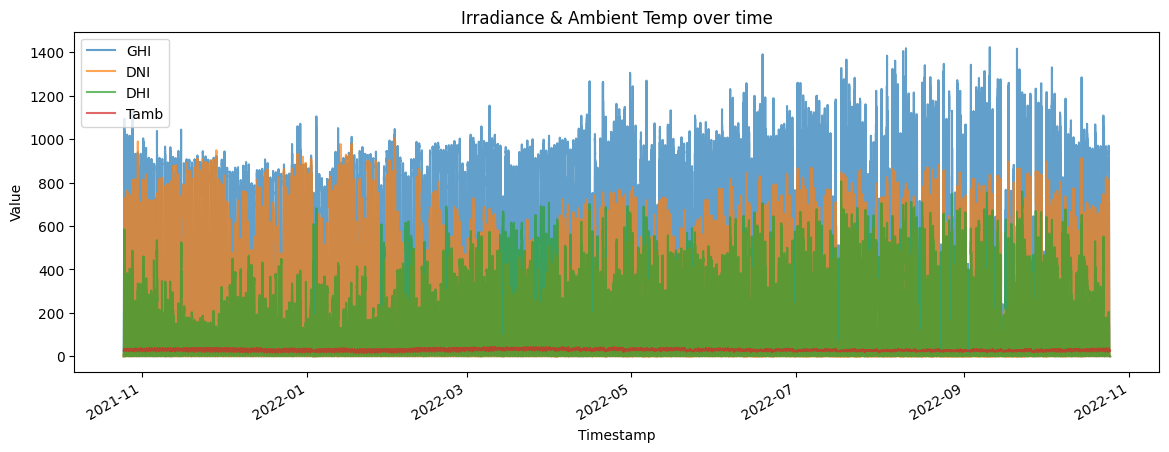

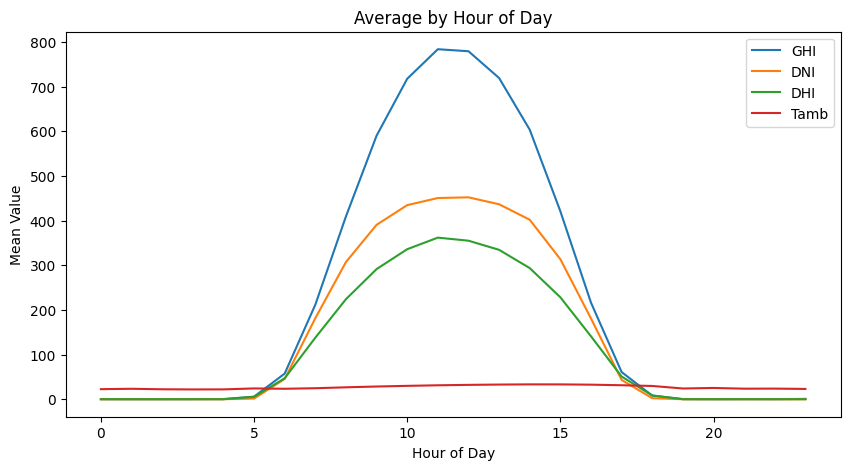

C:\Users\Admin\AppData\Local\Temp\ipykernel_6772\3160582229.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df[['GHI','DNI','DHI']].resample('M').mean()


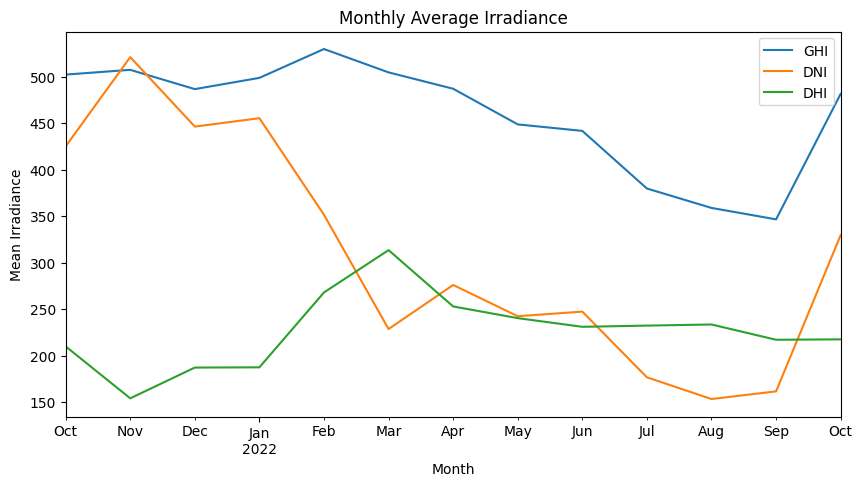

In [10]:
# Plots 
import matplotlib.pyplot as plt

# Plot GHI, DNI, DHI, Tamb over time
df[['GHI','DNI','DHI','Tamb']].plot(figsize=(14,5), alpha=0.7)
plt.title('Irradiance & Ambient Temp over time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

# Average by hour of day
hourly = df[['GHI','DNI','DHI','Tamb']].groupby(df.index.hour).mean()
hourly.plot(figsize=(10,5))
plt.title('Average by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Value')
plt.show()

# Monthly trends for irradiance
monthly = df[['GHI','DNI','DHI']].resample('M').mean()
monthly.plot(figsize=(10,5))
plt.title('Monthly Average Irradiance')
plt.xlabel('Month')
plt.ylabel('Mean Irradiance')
plt.show()


d) Cleaning Impact

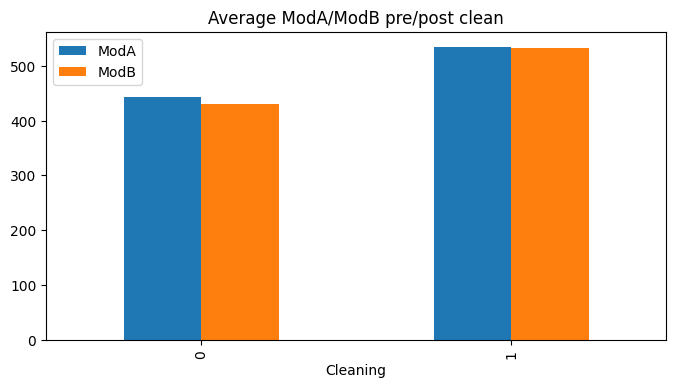

In [11]:
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean. 

# Check if Cleaning exists
if 'Cleaning' in df.columns:
    # Group by cleaning flag and Plot as bar chart
    df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(8,4))
    plt.title('Average ModA/ModB pre/post clean')
    plt.show()


e) Correlation & Relationship Analysis

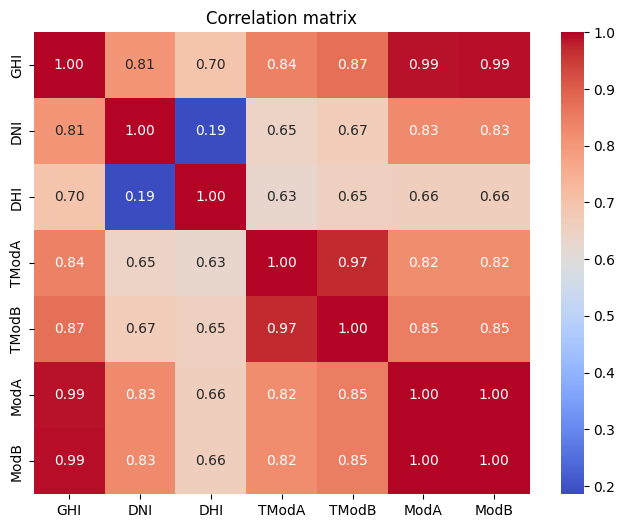

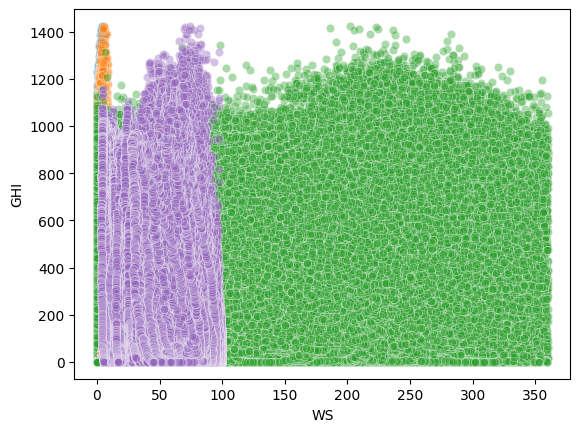

In [12]:
"""
Correlations reveal linear relationships between irradiance and module temperatures/outputs.

Heatmap and scatterplots show pairwise relationships.
"""
import seaborn as sns

# Heatmap
corr_cols = ['GHI','DNI','DHI','TModA','TModB','ModA','ModB']  
corr = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Scatter plots for irradiance vs wind
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.4)
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.4)
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.4)

# Scatter plots for humidity vs temperature/irradiance
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.4)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.4)

plt.show()

f) Wind & Distribution Analysis

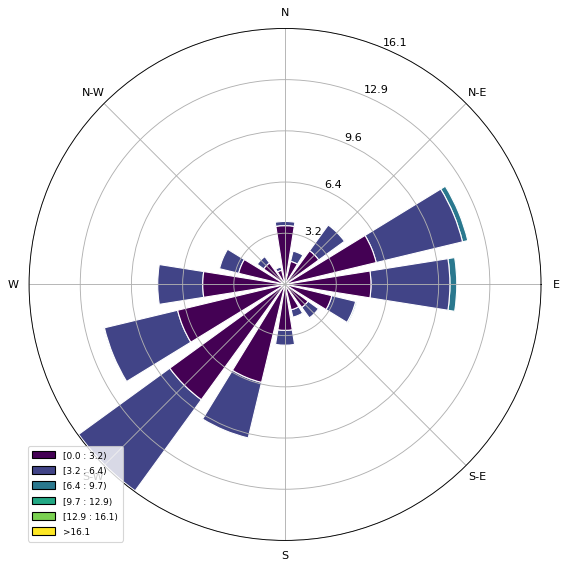

In [13]:
"""
Wind rose shows wind direction & speed distribution — useful to understand site conditions.

Histograms show distribution shapes (skewness), helpful for transformation decisions.
"""
# Wind rose
# pip install windrose
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'].dropna(), df['WS'].dropna(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

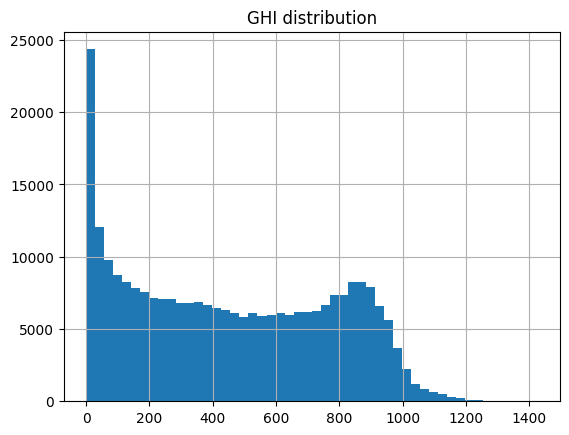

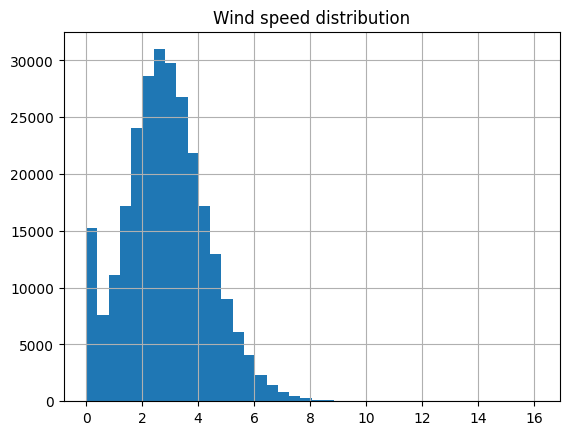

In [14]:
# Histogram for GHI
df['GHI'].hist(bins=50)
plt.title('GHI distribution')
plt.show()

# Histogram for WS
df['WS'].hist(bins=40)
plt.title('Wind speed distribution')
plt.show()


g) Temperature Analysis

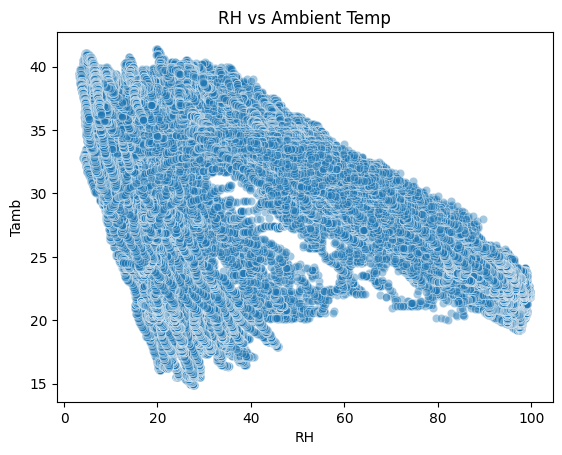

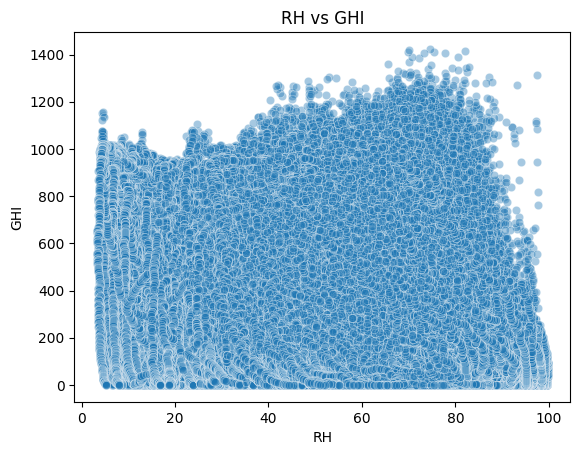

C:\Users\Admin\AppData\Local\Temp\ipykernel_6772\2188816867.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RH_bin')[['Tamb','GHI']].mean()


,Tamb,GHI
RH_bin,,
"(3.204, 22.6]",32.346478,561.233108
"(22.6, 41.9]",31.869203,457.837283
"(41.9, 61.2]",32.287462,545.579304
"(61.2, 80.5]",28.408857,457.309375
"(80.5, 99.8]",24.224523,187.991397


In [15]:
"""
Analyze how RH affects temperature readings and radiation. High humidity may correlate with lower GHI due to cloudiness.
"""
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.4)
plt.title('RH vs Ambient Temp')
plt.show()

sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.4)
plt.title('RH vs GHI')
plt.show()

# Group by RH buckets and summarize
df['RH_bin'] = pd.cut(df['RH'], bins=5)
df.groupby('RH_bin')[['Tamb','GHI']].mean()


h) Bubble Chart

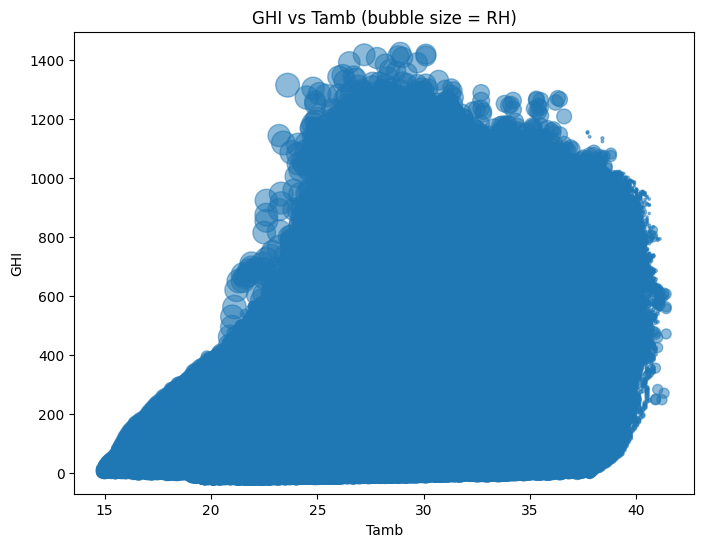

In [16]:
"""
Bubble chart adds a third variable (bubble size) to scatter relationships — here GHI vs Tamb with bubble = RH (or BP).
"""
plt.figure(figsize=(8,6))
sizes = (df['RH'] - df['RH'].min()).fillna(1)  # scale sizes
sizes = (sizes / sizes.max()) * 300           # scale to reasonable marker sizes
plt.scatter(df['Tamb'], df['GHI'], s=sizes, alpha=0.5)
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.show()
